### Registration ID : GO_STP_9654

### Predict Loan Eligibility for Dream Housing Finance company

Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online 
application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers.

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [120]:
df = pd.read_csv("Loan Predication.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [121]:
df = df.drop(['Loan_ID'], axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [123]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [124]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


In [125]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


After Dummy variable Trap we handling with missing data value

In [126]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Visualization 

In [82]:
import seaborn as sb

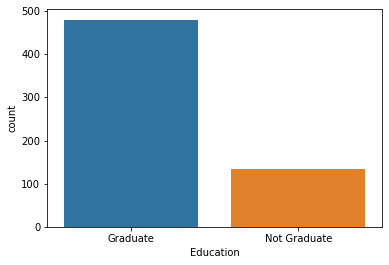

In [12]:
sb.countplot(x = "Education", data = df);

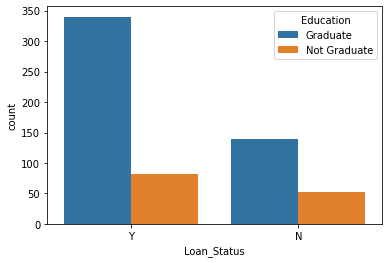

In [13]:
sb.countplot(x = "Loan_Status", hue = "Education", data = df);

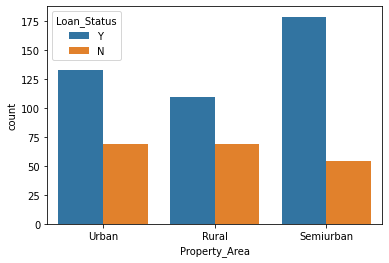

In [14]:
sb.countplot(x = "Property_Area", hue = "Loan_Status", data = df);

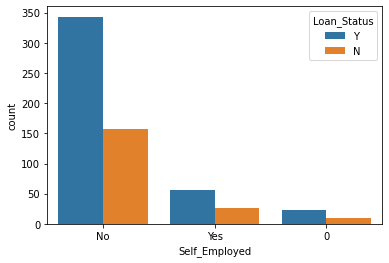

In [15]:
sb.countplot(x = "Self_Employed", hue = "Loan_Status", data = df);

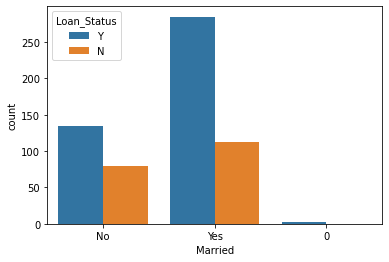

In [16]:
sb.countplot(x = "Married", hue = "Loan_Status", data = df);

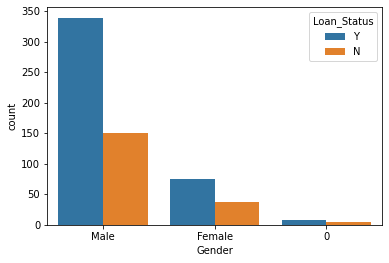

In [17]:
sb.countplot(x = "Gender", hue = "Loan_Status", data = df);

### Dummy Variable

In [127]:
df1 = df
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [128]:
print(df1['Gender'].unique())
print(df1['Married'].unique())
print(df1['Education'].unique())
print(df1['Self_Employed'].unique())
print(df1['Property_Area'].unique())

['Male' 'Female' nan]
['No' 'Yes' nan]
['Graduate' 'Not Graduate']
['No' 'Yes' nan]
['Urban' 'Rural' 'Semiurban']


In [129]:
dummies1 = pd.get_dummies(df1.Gender, drop_first=True)
dummies2 = pd.get_dummies(df1.Married, drop_first=True)
dummies3 = pd.get_dummies(df1.Education, drop_first=True)
dummies4 = pd.get_dummies(df1.Self_Employed, drop_first=True)
dummies5 = pd.get_dummies(df1.Property_Area, drop_first=True)

In [131]:
print(dummies1.head(2))
print(dummies2.head(2))
print(dummies3.head(2))
print(dummies4.head(2))
print(dummies5.head(2))

   Male
0     1
1     1
   Yes
0    0
1    1
   Not Graduate
0             0
1             0
   Yes
0    0
1    0
   Semiurban  Urban
0          0      1
1          0      0


In [132]:
df1 = df1.drop(['Gender','Married','Education','Self_Employed','Property_Area'], axis='columns')
df1.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,0,5849,0.0,NaN,360.0,1.0,Y
1,1,4583,1508.0,128.0,360.0,1.0,N
2,0,3000,0.0,66.0,360.0,1.0,Y
3,0,2583,2358.0,120.0,360.0,1.0,Y
4,0,6000,0.0,141.0,360.0,1.0,Y


In [133]:
df1 = pd.concat([df1,dummies1,dummies2,dummies3,dummies4,dummies5], axis='columns')
df1.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Male,Yes,Not Graduate,Yes,Semiurban,Urban
0,0,5849,0.0,NaN,360.0,1.0,Y,1,0,0,0,0,1
1,1,4583,1508.0,128.0,360.0,1.0,N,1,1,0,0,0,0
2,0,3000,0.0,66.0,360.0,1.0,Y,1,1,0,1,0,1
3,0,2583,2358.0,120.0,360.0,1.0,Y,1,1,1,0,0,1
4,0,6000,0.0,141.0,360.0,1.0,Y,1,0,0,0,0,1


In [135]:
df1.isnull().sum()

Dependents           15
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Loan_Status           0
Male                  0
Yes                   0
Not Graduate          0
Yes                   0
Semiurban             0
Urban                 0
dtype: int64

In [136]:
df1 = df1.fillna(0)

In [137]:
df1.isnull().sum()

Dependents           0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Loan_Status          0
Male                 0
Yes                  0
Not Graduate         0
Yes                  0
Semiurban            0
Urban                0
dtype: int64

In [138]:
# Final Dataset
df1.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Male,Yes,Not Graduate,Yes,Semiurban,Urban
0,0,5849,0.0,0.0,360.0,1.0,Y,1,0,0,0,0,1
1,1,4583,1508.0,128.0,360.0,1.0,N,1,1,0,0,0,0
2,0,3000,0.0,66.0,360.0,1.0,Y,1,1,0,1,0,1
3,0,2583,2358.0,120.0,360.0,1.0,Y,1,1,1,0,0,1
4,0,6000,0.0,141.0,360.0,1.0,Y,1,0,0,0,0,1


In [146]:
df1["Dependents"] = df1["Dependents"].replace(['3+'],[3])

In [147]:
#
y = df1['Loan_Status'] 
x = df1.drop(['Loan_Status'], axis='columns')
print(x.shape)
print(y.shape)

(614, 12)
(614,)


In [148]:
x.head() # Features

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Male,Yes,Not Graduate,Yes,Semiurban,Urban
0,0,5849,0.0,0.0,360.0,1.0,1,0,0,0,0,1
1,1,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0
2,0,3000,0.0,66.0,360.0,1.0,1,1,0,1,0,1
3,0,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,1
4,0,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,1


In [149]:
y.head() # Label

0    Y
1    N
2    Y
3    Y
4    Y
Name: Loan_Status, dtype: object

In [150]:
# split data into test and train
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x, y, test_size=0.3, random_state=1)

In [151]:
import sklearn as sns
from sklearn.tree import DecisionTreeClassifier

In [152]:
 # create decision tree classifier
model = DecisionTreeClassifier(random_state = 1)

In [153]:
# train model by provideing training data
Mymodel = model.fit(xtrain, ytrain)

In [154]:
# Prediction
y_pred = Mymodel.predict(xtest)
y_pred

array(['N', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N',
       'Y', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'N

### Accuracy Score And Confusion Matrix

In [156]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_pred, ytest)
accuracy

0.6918918918918919

In [157]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_pred, ytest)
cm

array([[32, 28],
       [29, 96]], dtype=int64)

### Plot Decision Tree

[Text(145.43649044389645, 210.192, 'X[5] <= 0.5\ngini = 0.424\nsamples = 429\nvalue = [131, 298]'),
 Text(25.23384710234279, 195.696, 'X[3] <= 82.0\ngini = 0.449\nsamples = 100\nvalue = [66, 34]'),
 Text(9.907768187422935, 181.2, 'X[4] <= 330.0\ngini = 0.133\nsamples = 14\nvalue = [13, 1]'),
 Text(6.60517879161529, 166.704, 'X[1] <= 2068.0\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(3.302589395807645, 152.208, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(9.907768187422935, 152.208, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(13.21035758323058, 166.704, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(40.55992601726264, 181.2, 'X[3] <= 99.5\ngini = 0.473\nsamples = 86\nvalue = [53, 33]'),
 Text(23.118125770653517, 166.704, 'X[2] <= 812.5\ngini = 0.463\nsamples = 11\nvalue = [4, 7]'),
 Text(16.512946979038226, 152.208, 'X[10] <= 0.5\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(13.21035758323058, 137.712, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(19.815

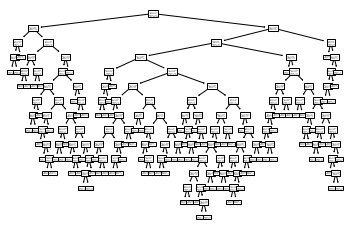

In [159]:
from sklearn import tree
tree.plot_tree(Mymodel)

In [160]:
text_representation = tree.export_text(Mymodel)
print(text_representation)

|--- feature_5 <= 0.50
|   |--- feature_3 <= 82.00
|   |   |--- feature_4 <= 330.00
|   |   |   |--- feature_1 <= 2068.00
|   |   |   |   |--- class: Y
|   |   |   |--- feature_1 >  2068.00
|   |   |   |   |--- class: N
|   |   |--- feature_4 >  330.00
|   |   |   |--- class: N
|   |--- feature_3 >  82.00
|   |   |--- feature_3 <= 99.50
|   |   |   |--- feature_2 <= 812.50
|   |   |   |   |--- feature_10 <= 0.50
|   |   |   |   |   |--- class: Y
|   |   |   |   |--- feature_10 >  0.50
|   |   |   |   |   |--- class: N
|   |   |   |--- feature_2 >  812.50
|   |   |   |   |--- feature_1 <= 1929.00
|   |   |   |   |   |--- class: N
|   |   |   |   |--- feature_1 >  1929.00
|   |   |   |   |   |--- class: Y
|   |   |--- feature_3 >  99.50
|   |   |   |--- feature_3 <= 547.50
|   |   |   |   |--- feature_3 <= 186.00
|   |   |   |   |   |--- feature_3 <= 110.50
|   |   |   |   |   |   |--- feature_4 <= 300.00
|   |   |   |   |   |   |   |--- feature_2 <= 665.00
|   |   |   |   |   |   |   | 